***PROBLEM SET 2***

**Find the Probability that a passenger survived.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
titanic_data = pd.read_csv('../knn/train.csv', header=0)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [2]:
titanic_data.Survived.mean()


0.3838383838383838

38% of Surviving the Titanic.

**Probability of female passenger with at least one sibling or spouse on board**

In [3]:
fem_sibsp = titanic_data[(titanic_data.Sex == 'female') & (titanic_data.SibSp > 0)]

ans = len(fem_sibsp)/len(titanic_data.PassengerId)
print(ans)

0.15712682379349047


There is a 15% Chance of being female with a sibling or spouse on board.

**What is the probability of being a survivor from Cherbourg**

In [4]:
from_cherb = titanic_data[(titanic_data.Embarked == 'C') & (titanic_data.Survived == 1)]
print(len(from_cherb))

93


In [5]:
print(len(from_cherb)/len(titanic_data.PassengerId))

0.10437710437710437


10% chance of a passenger surviving from Cherbourg

**Plot the distribution of passenger ages.**


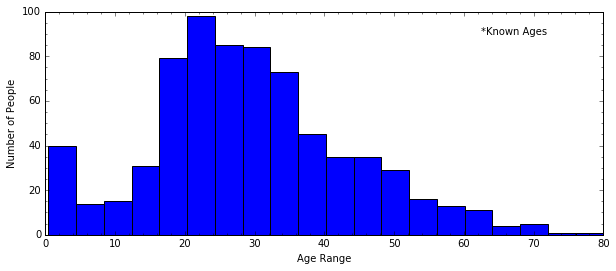

714


In [6]:
titanic_data_no_ages = titanic_data.dropna(subset=['Age'])
%matplotlib inline
h, edges = np.histogram(titanic_data_no_ages.Age.values, bins=20)
plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], h, width=edges[1] - edges[0])
ax.text(0.9,0.9, '*Known Ages', horizontalalignment='right', transform=ax.transAxes)
ax.set_xlabel('Age Range')
ax.set_ylabel('Number of People')
ax.minorticks_on()
plt.show()
print(len(titanic_data_no_ages))

**Probability that a passenger was less than 10 years old**

In [7]:
print(len(titanic_data[titanic_data.Age < 10])/len(titanic_data.PassengerId))

0.06958473625140292


7% probability that a passenger was under 10 years old

**What is the probability of exactly 42 passengers surviving if 100 passengers are chosen at random?**

In [8]:
from scipy.stats import binom

binom.pmf(42, 100, 0.38)

0.057647821612310038

Roughly 6%

** What's the probability that at least 42 of those 100 passengers survive?**

In [9]:
prob_42 = binom.cdf(42, 100, 0.38)
print(1 - prob_42)

0.176643990901


Roughly 18% chance that at least 42 survive

**Is there a statistically significant difference between the ages of male and female survivors?** 

In [26]:
from scipy.stats import ttest_ind

fem_surv_avg_age = titanic_data[(titanic_data.Survived == 1) & (titanic_data.Sex =='female') & (titanic_data.Age > 0)].Age
male_surv_avg_age = titanic_data[(titanic_data.Survived == 1) & (titanic_data.Sex =='male') & (titanic_data.Age > 0)].Age

t_stat, p_value = ttest_ind(male_surv_avg_age, fem_surv_avg_age)

print("Results: %.5f"% p_value)

Results: 0.40434


The age difference between the male and female survivors is statistically significant because the p-value is over .05. 

**Is there a statistically significant difference between fares paid by the passengers from Queenstown and the ones from Cherbourg? **

In [25]:
queen_fare = titanic_data[(titanic_data['Embarked'] == 'Q')].Fare
cherb_fare = titanic_data[(titanic_data['Embarked'] == 'C')].Fare

t_stat, p_value = ttest_ind(cherb_fare, queen_fare)
print("Results: %.5f"% p_value)

Results: 0.00000


There is not a statistically significant difference between the fares paid at Queenstown and Cherbourg ports.


## Graph difference of ages between male and female survivors

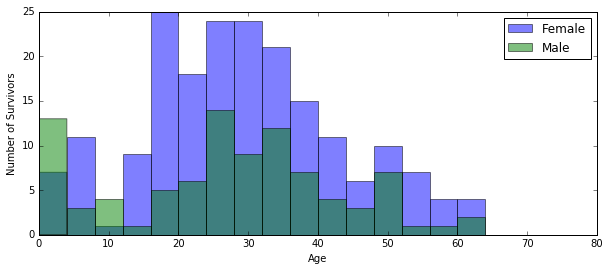

In [32]:
plt.figure(figsize=(10, 4))
opacity = 0.5

plt.hist(fem_surv_avg_age, bins=np.arange(0, 80, 4), alpha=opacity, label='Female')
plt.hist(male_surv_avg_age, bins=np.arange(0, 80, 4), alpha=opacity, label='Male')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Number of Survivors')
plt.show()

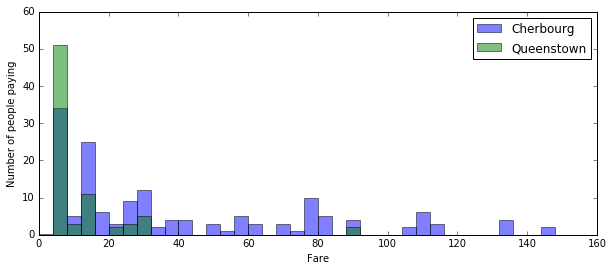

In [37]:
plt.figure(figsize=(10, 4))
opacity = 0.5
plt.hist(cherb_fare, bins=np.arange(0, 150, 4), alpha=opacity, label='Cherbourg')
plt.hist(queen_fare, bins=np.arange(0, 150, 4), alpha=opacity, label='Queenstown')

plt.legend()
plt.xlabel('Fare')
plt.ylabel('Number of people paying')
plt.show()